In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import factorial

In [34]:
mu = 0
s = 3
b = 20
tau = 1
N_exp = 10000
m = b*tau


In [48]:
# mu_hat = (N_exp-b)/s
b_hat = b*tau
b_hat
# mu_hat

def mu_hat(n):
    return (n - b) / s
def b_dhat(n):
    num = (n+m-((1+tau)*mu*s))**2+(4*(1+tau)*m*mu*s)
    den = 4*(1+tau)**2
    b_dhat = ((n+m-((1+tau)*mu*s))/(2*(1+tau)))+(num/den)**(1/2)
    return b_dhat

In [49]:
# mu_hat(samples_mu0)
b_dhat(samples_mu0)    

array([18.5, 16. , 15. , ..., 19. , 20. , 18. ])

In [46]:
# generate poisson samples
samples_mu0 = np.random.poisson(b, N_exp)
samples_m = np.random.poisson(m, N_exp)

In [5]:
samples_mu0.shape
samples_m.shape

(10000,)

In [17]:
samples_mu0

array([22, 22, 23, ..., 21, 25, 27])

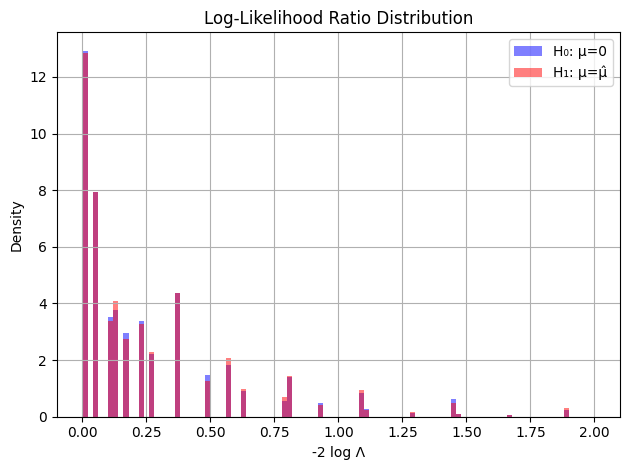

In [ ]:
# Likelihood functions
def Likelihood_b(samples, b):
    return np.exp(-b) * (b**samples) / factorial(samples)

def Likelihood_sb(samples, b, mu, s):
    N = (mu * s) + b
    return np.exp(-N) * (N**samples) / factorial(samples)

# L0_vals = Likelihood_b(samples_mu0, b_dhat)
# print(factorial(samples_mu0))

# Log-likelihood ratio
def log_likelihood_ratio(samples):
    L0_vals = Likelihood_b(samples, b_dhat(samples))
    L1_vals = Likelihood_sb(samples, b_hat, mu_hat(samples), s)
    
    # Avoid divide-by-zero warning
    return np.where(L0_vals != 0, -2 * np.log(L0_vals / L1_vals), np.inf)

# Compute test statistics
llr_mu0 = log_likelihood_ratio(samples_mu0)
llr_mu  = log_likelihood_ratio(samples_m)

# print(L0_vals)

# Plot distributions
plt.hist(llr_mu0, bins=100, alpha=0.5, label='H₀: μ=0', color='blue', density=True, range=(0, 2))
# plt.hist(llr_mu, bins=100, alpha=0.5, label='H₁: μ=μ̂', color='red', density=True, range=(0, 2))
plt.xlabel('-2 log Λ')
plt.ylabel('Density')
plt.title('Log-Likelihood Ratio Distribution')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
# Step 1: Find critical value from H0 distribution (right tail)
alpha = 0.05  # Significance level
critical_value = np.percentile(llr_mu0, 100 * (1 - alpha))

# Step 2: Compute power as area under H1 to the right of critical value
power = np.mean(llr_mu > critical_value)

print(f"Critical value at α = {alpha}: {critical_value:.4f}")
print(f"Power of the likelihood ratio test: {power:.4f}")

Critical value at α = 0.05: 1.0956
Power of the likelihood ratio test: 0.0331
